In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge

In [2]:
# Get all the data files
root_dir = os.path.join('..', '..', '..', 'data', 'pdg13-n25-0.5to10GeV-0.5eta')
final_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_final.csv")])
hit_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])

In [3]:
# get the dataframes for every one of these files
final_dfs = [pd.read_csv(os.path.join(root_dir, file)) for file in final_files]
dfs = [pd.read_csv(os.path.join(root_dir, file)) for file in hit_files]
dfs[0]

,particle_id,geometry_id,tx,ty,tz,tt,tpx,tpy,tpz,te,deltapx,deltapy,deltapz,deltae,index
0,4503599728033792,936748859932016651,32.272884,-0.712434,-0.315054,0.107714,4.315339,-0.085583,-0.042125,4.317686,0,0,0,0,0
1,4503599946137600,936748859932016651,32.187237,-0.001743,-2.157965,0.108509,0.813235,0.009605,-0.054525,0.821937,0,0,0,0,0
2,4503599862251520,936748859932016652,31.425819,6.312224,13.246838,0.115860,1.766618,0.364646,0.745482,1.954690,0,0,0,0,0
3,4503599962914816,936748859932016652,32.797543,-5.063643,9.198400,0.114882,7.182126,-1.098788,2.013875,7.540367,0,0,0,0,1
4,4503599644147712,936748859932016666,30.526699,10.914364,5.238789,0.109587,3.401895,1.226618,0.584373,3.664715,0,0,0,0,0
5,4503599862251520,936748859932016666,32.940971,6.625372,13.886239,0.121452,1.766431,0.365555,0.745482,1.954690,0,0,0,0,1
6,4503599912583168,936748859932016679,-20.531666,-24.508099,-1.511850,0.106804,-2.511400,-3.012717,-0.185468,3.927997,0,0,0,0,0
7,4503599744811008,936748859932016694,-7.851760,-30.985767,3.505122,0.107279,-1.502871,-5.969863,0.675048,6.193927,0,0,0,0,0
8,4503599979692032,936748859932016707,6.581261,-31.393381,-11.756757,0.114065,0.470587,-2.197890,-0.823849,2.396260,0,0,0,0,0
9,4503600030023680,936748859932016707,5.025425,-31.580996,-14.615366,0.117314,0.645030,-3.992521,-1.848399,4.447924,0,0,0,0,0


### Plot all the hits from a random file

Event chosen: event000000094-hits.csv


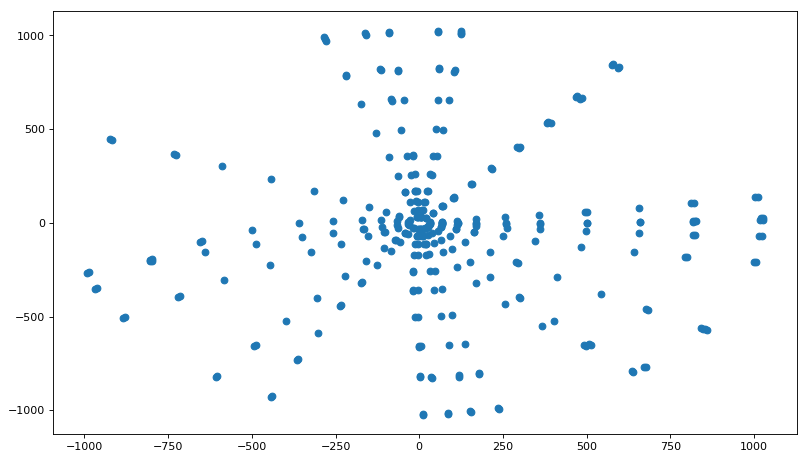

In [4]:
random_event = random.choice(range(0, len(dfs)))
print(f'Event chosen: {hit_files[random_event]}')
df = dfs[random_event]
final_df = final_dfs[random_event]
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x=df['tx'], y=df['ty'])

Looks messy. Let's try to plot the hits of every particle with a different color.

In [5]:
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta',
    'yellow', 'black', 'orange', 'purple', 'brown',
    'pink', 'grey', 'maroon', 'gold', 'chocolate',
    'aqua', 'darkviolet', 'crimson', 'navy', 'darkgreen',
    'peru', 'tan', 'seagreen', 'darkslategrey', 'teal'
]

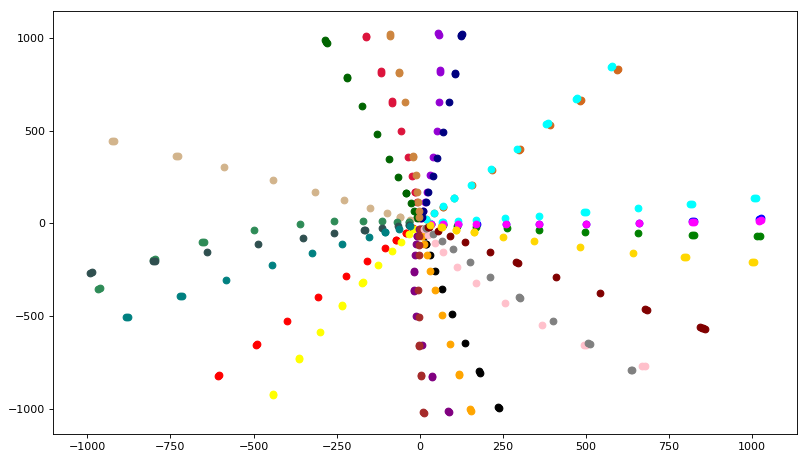

In [6]:
# get every particle
unique_particle_ids = list(set(df['particle_id']))
plt.figure(figsize=(12, 7), dpi=80)

# plot its track
for idx, pid in enumerate(unique_particle_ids):
    particle_df = df[df['particle_id'] == pid]
    plt.scatter(x=particle_df['tx'], y=particle_df['ty'], color=colors[idx])

Now we would like to fit a circle in them. Effectively, fitting a circle means finding a center and a radius. Therefore it makes sense to convert the cartesian coordinates to polar coordinates and try to fit there a straight line using Linear Regression.

### Let's try to convert the hits of 1 particle to polar coordinates

In [7]:
particle1 = unique_particle_ids[10]
particle1_df = df[df['particle_id'] == particle1]
train_xs = list(particle1_df['tx']).copy()
train_ys = list(particle1_df['ty']).copy()

Let's first plot the normal coordinates.

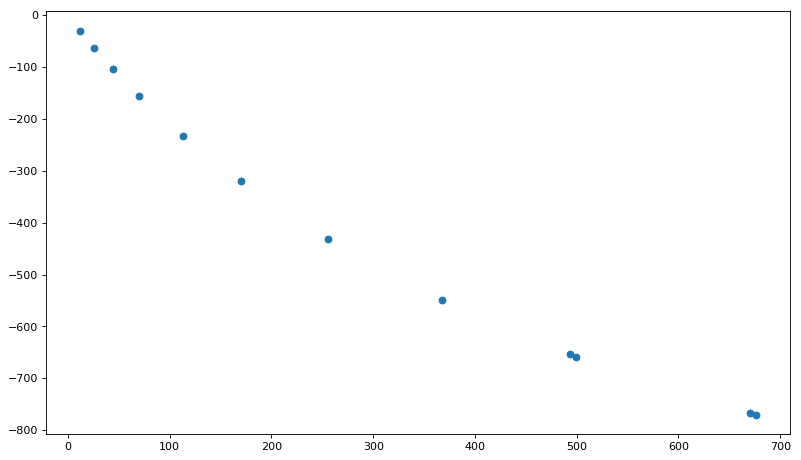

In [8]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x=train_xs, y=train_ys)

Create helper methods that can convert cartesion coordinates to polar and vice-versa.

In [9]:
def cartesian_to_polar(x, y):
    rho = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)
    return rho, phi

def polar_to_cartesian(rho, phi):
        x = rho * np.cos(phi)
        y = rho * np.sin(phi)
        return x, y
    
def convert_list_of_coordinates(list1, list2, convert_function):
    result_list1 = []
    result_list2 = []
    for a, b in zip(list1, list2):
        result_a, result_b = convert_function(a, b)
        result_list1.append(result_a)
        result_list2.append(result_b)
    return result_list1, result_list2

Now convert the cartesion coordinates to polar and plot them.

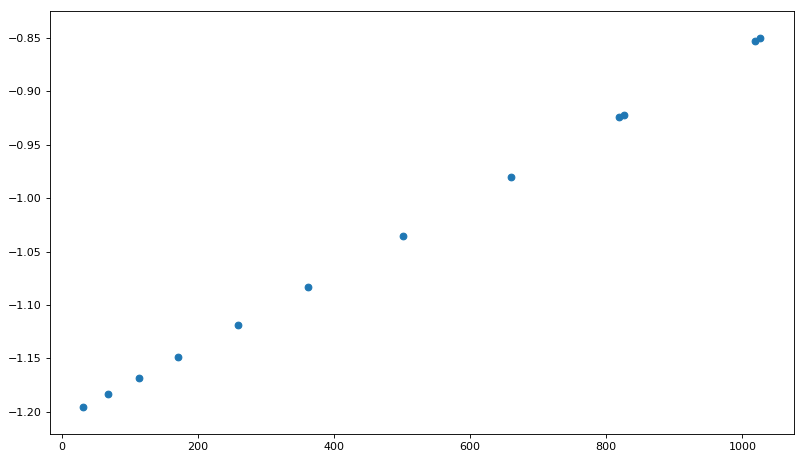

In [10]:
rhos, phis = convert_list_of_coordinates(train_xs, train_ys, cartesian_to_polar)
    
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x=rhos, y=phis)

Train a Linear Regressor to fit the polar coordinates.

In [11]:
clf = Ridge(alpha=1)
clf.fit(np.array(rhos).reshape(-1, 1), phis)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Get the parameters and show the fitted linear function.

Linear function fitted: y = [0.00034744]x + -1.2082087127266992.


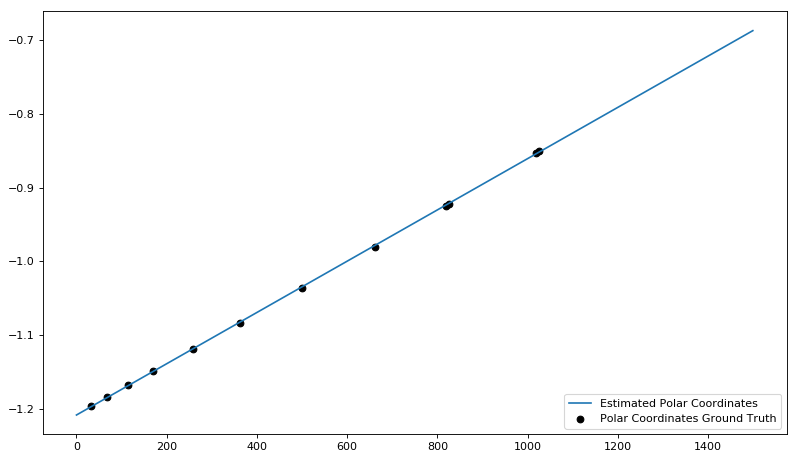

In [12]:
m = clf.coef_
b = clf.intercept_
print(f'Linear function fitted: y = {m}x + {b}.')

test_xs = list(range(0, 1500))
test_ys = [m * test_x + b for test_x in test_xs]

# plot polar coords
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x=rhos, y=phis, label='Polar Coordinates Ground Truth', color='k')
plt.plot(test_xs, test_ys, label='Estimated Polar Coordinates')
plt.legend(loc='lower right')

Convert the test polar coordinates back to cartesian and plot them to see if the circle arc is actually being fit correctly.

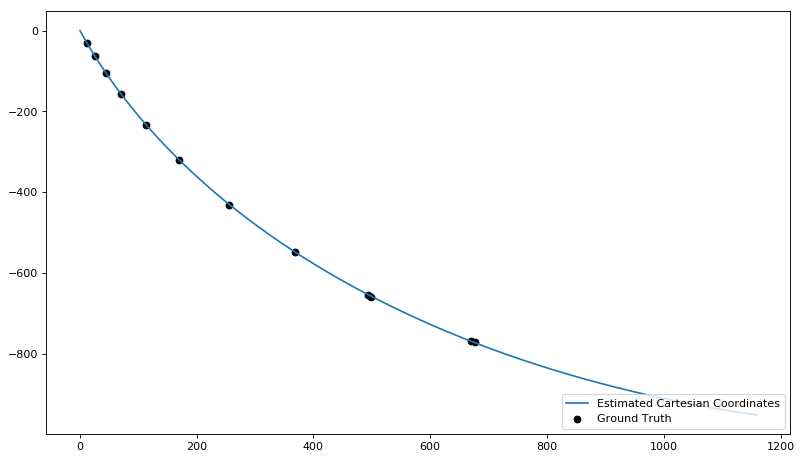

In [13]:
test_xs_cartesian, test_ys_cartesian = convert_list_of_coordinates(test_xs, test_ys, polar_to_cartesian)
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x=train_xs, y=train_ys, label='Ground Truth', color='k')
plt.plot(test_xs_cartesian, test_ys_cartesian, label='Estimated Cartesian Coordinates')
plt.legend(loc='lower right')

Having all these values, pick 3 points randomly and create a circle using geometric properties.

In [14]:
p1, p2, p3 = random.sample(list(zip(test_xs_cartesian, test_ys_cartesian)), k=3)
(p1, p2, p3)

((array([389.39818247]), array([-567.19754538])),
 (array([984.01058105]), array([-905.14759923])),
 (array([103.01456516]), array([-215.6594523])))

In [15]:
def minor(arr, i, j):
    """remove the ith row and jth column of an array """
    return arr[np.array(list(range(i)) + list(range(i + 1, arr.shape[0])))[:, np.newaxis],
               np.array(list(range(j)) + list(range(j + 1, arr.shape[1])))]

A = np.array([
    [0, 0, 0, 1],
    [p1[0][0] ** 2 + p1[1][0] ** 2, p1[0][0], p1[1][0], 1],
    [p2[0][0] ** 2 + p2[1][0] ** 2, p2[0][0], p2[1][0], 1],
    [p3[0][0] ** 2 + p3[1][0] ** 2, p3[0][0], p3[1][0], 1],
])

x_0 = (1 / 2) * np.linalg.det(minor(A, 0, 1)) / np.linalg.det(minor(A, 0, 0))
y_0 = (-1 / 2) * np.linalg.det(minor(A, 0, 2)) / np.linalg.det(minor(A, 0, 0))
r = np.sqrt(x_0 ** 2 + y_0 ** 2 + np.linalg.det(minor(A, 0, 3)) / np.linalg.det(minor(A, 0, 0)))

# circle center and radius
(x_0, y_0), r

((1431.4044770779988, 574.1036204850142), 1545.4272772335403)

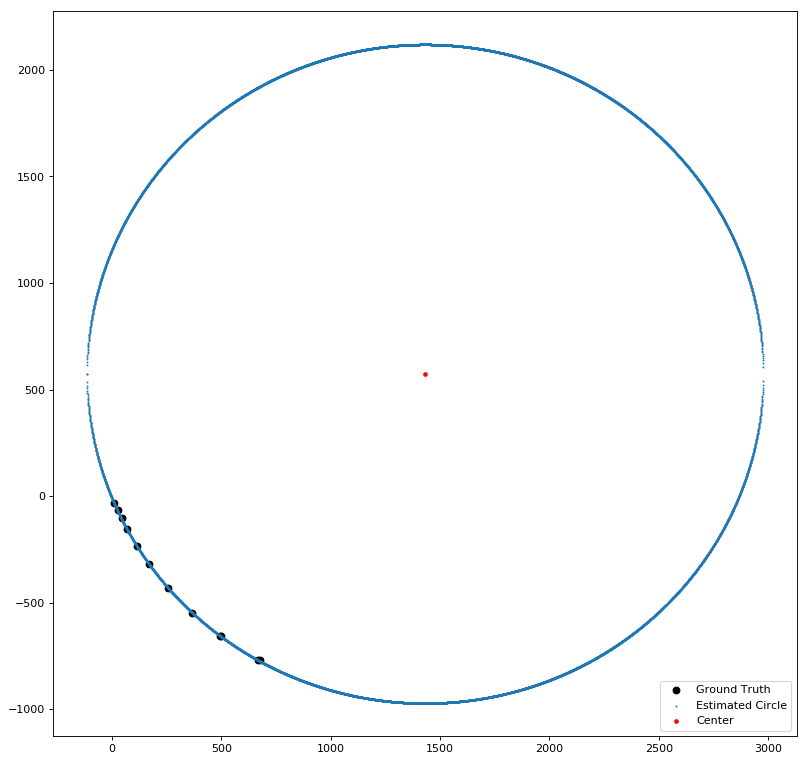

In [16]:
circle_points = []
for x in np.arange(x_0 - r, x_0 + r, 0.5):
    y1 = y_0 + np.sqrt(r ** 2 - (x - x_0) ** 2)
    y2 = y_0 - np.sqrt(r ** 2 - (x - x_0) ** 2)
    circle_points.append((x, y1))
    circle_points.append((x, y2))
    
circle_xs = [point[0] for point in circle_points]
circle_ys = [point[1] for point in circle_points]

plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(x=train_xs, y=train_ys, label='Ground Truth', color='k')
plt.scatter(x=circle_xs, y=circle_ys, label='Estimated Circle', s=0.5)
plt.scatter(x=[x_0], y=[y_0], label='Center', color='r', s=10)
plt.legend(loc='lower right')

### Let's now compute the estimation and the ground truth for the transverse momentum

In [17]:
final_df1 = final_df[final_df['particle_id'] == particle1]
q = final_df1['q'].iloc[0]
B = -0.00059
pt_est = (q * B * r)
pt_ground_truth = np.sqrt(final_df1['px'].iloc[0] ** 2 + final_df1['py'].iloc[0] ** 2)

Print to see the results

In [18]:
print(f'Estimated Transverse Momentum: {pt_est}\nGround Truth Transverse Momentum: {pt_ground_truth}')

Estimated Transverse Momentum: 0.880790090022016
Ground Truth Transverse Momentum: 0.880790090022016
